In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import adjusted_rand_score
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score
from sklearn.metrics import confusion_matrix
from statsmodels.graphics.mosaicplot import mosaic

In [2]:
# Step 4: Exploring Data
# Load the dataset
mcdonalds = pd.read_csv("mcdonalds.csv")

In [3]:
# Display column names, dimensions and the first 3 rows of the dataset
print(mcdonalds.columns)
print(mcdonalds.shape)
print(mcdonalds.head(3))

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')
(1453, 15)
  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No    2   51  Every three months  Female  
2         No    1   62  Every three months  Female  


In [4]:
# Preprocessing the data
md_x = mcdonalds.iloc[:, 0:11].apply(lambda x: LabelEncoder().fit_transform(x))
mdx = md_x.values
np.round(np.mean(mdx, axis=0), 2)

array([0.55, 0.91, 0.09, 0.87, 0.53, 0.9 , 0.6 , 0.64, 0.36, 0.2 , 0.24])

In [5]:
# Perform Principal Components Analysis (PCA)
pca = PCA()
md_pca = pca.fit_transform(md_x)
pca_df = pd.DataFrame(md_pca, columns=md_x.columns)
summary = pd.DataFrame(index=["PC" + str(i) for i in range(1, len(pca.components_)+1)])
summary["Standard deviation"] = np.sqrt(pca.explained_variance_).round(5)
summary["Proportion of Variance"] = pca.explained_variance_ratio_.round(5)
summary["Cumulative Proportion"] = np.cumsum(pca.explained_variance_ratio_).round(5)
print(summary)

      Standard deviation  Proportion of Variance  Cumulative Proportion
PC1              0.75705                 0.29945                0.29945
PC2              0.60746                 0.19280                0.49224
PC3              0.50462                 0.13305                0.62529
PC4              0.39880                 0.08310                0.70839
PC5              0.33741                 0.05948                0.76787
PC6              0.31027                 0.05030                0.81817
PC7              0.28970                 0.04385                0.86201
PC8              0.27512                 0.03955                0.90156
PC9              0.26525                 0.03676                0.93832
PC10             0.24884                 0.03235                0.97068
PC11             0.23690                 0.02932                1.00000


In [6]:
print("Standard deviations: ")
print(np.round(np.sqrt(pca.explained_variance_), 1))
print("\nRotation (n x k) = (11 x 11):")
loading = pd.DataFrame(pca.components_.T, index=mcdonalds.columns[:11], columns=[f'PC{i}' for i in range(1, len(pca.components_)+1)])
loading *= -1
loading = loading.round(2)
print(loading)

Standard deviations: 
[0.8 0.6 0.5 0.4 0.3 0.3 0.3 0.3 0.3 0.2 0.2]

Rotation (n x k) = (11 x 11):
             PC1   PC2   PC3   PC4   PC5   PC6   PC7   PC8   PC9  PC10  PC11
yummy       0.48 -0.36  0.30 -0.06  0.31 -0.17  0.28 -0.01 -0.57  0.11 -0.05
convenient  0.16 -0.02  0.06  0.14 -0.28  0.35  0.06  0.11  0.02  0.67  0.54
spicy       0.01 -0.02  0.04 -0.20 -0.07  0.36 -0.71 -0.38 -0.40  0.08 -0.14
fattening  -0.12  0.03  0.32  0.35  0.07  0.41  0.39 -0.59  0.16  0.01 -0.25
greasy     -0.30  0.06  0.80 -0.25 -0.36 -0.21 -0.04  0.14  0.00 -0.01 -0.00
fast        0.11  0.09  0.06  0.10 -0.11  0.59  0.09  0.63 -0.17 -0.24 -0.34
cheap       0.34  0.61  0.15 -0.12  0.13  0.10  0.04 -0.14 -0.08 -0.43  0.49
tasty       0.47 -0.31  0.29  0.00  0.21  0.08 -0.36  0.07  0.64 -0.08 -0.02
expensive  -0.33 -0.60 -0.02 -0.07  0.00  0.26  0.07 -0.03 -0.07 -0.45  0.49
healthy     0.21 -0.08 -0.19 -0.76 -0.29  0.18  0.35 -0.18  0.19  0.04 -0.16
disgusting -0.37  0.14  0.09 -0.37  0.73  0.21  0.03  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


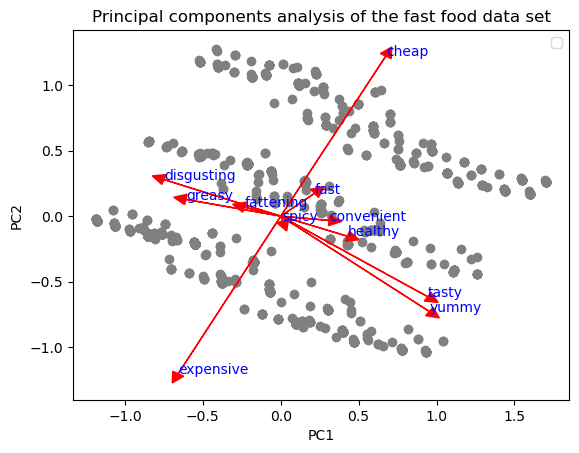

In [7]:
# Visualizing PCA loadings
plt.scatter(md_pca[:, 0], md_pca[:, 1], color="grey")
scale = 2
for i, column_name in enumerate(mcdonalds.columns[0:11]):
    plt.arrow(0, 0, -pca.components_[0, i]*scale, -pca.components_[1, i]*scale,
              head_width=0.08, head_length=0.08, fc='red', ec='red')
    plt.text(-pca.components_[0, i] * 2, -pca.components_[1, i] * 2, column_name, color='blue')

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Principal components analysis of the fast food data set")
plt.legend()
plt.show()

In [8]:
# Step 5: Extracting Segments
# 5.1 Using k-Means
np.random.seed(1234)
k_values = range(2, 9)
inertia_values = []
k_result = []
silhouette_scores = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
    md_k4 = kmeans.fit(pca_df)
    labels = kmeans.predict(pca_df)
    silhouette_score_ = silhouette_score(pca_df, labels)
    inertia_values.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score_)
    k_result.append(labels)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

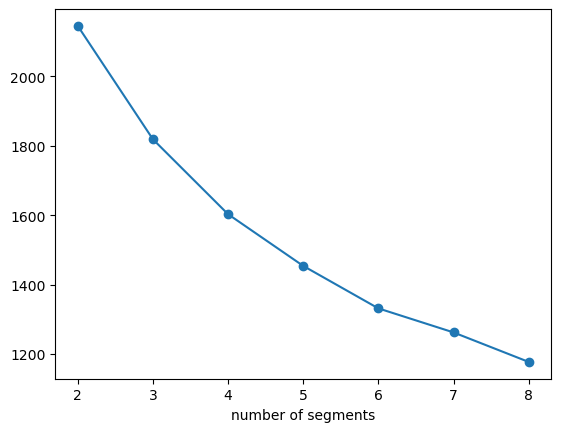

In [9]:
# Plot for the fast food data set
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel("number of segments")
plt.show()

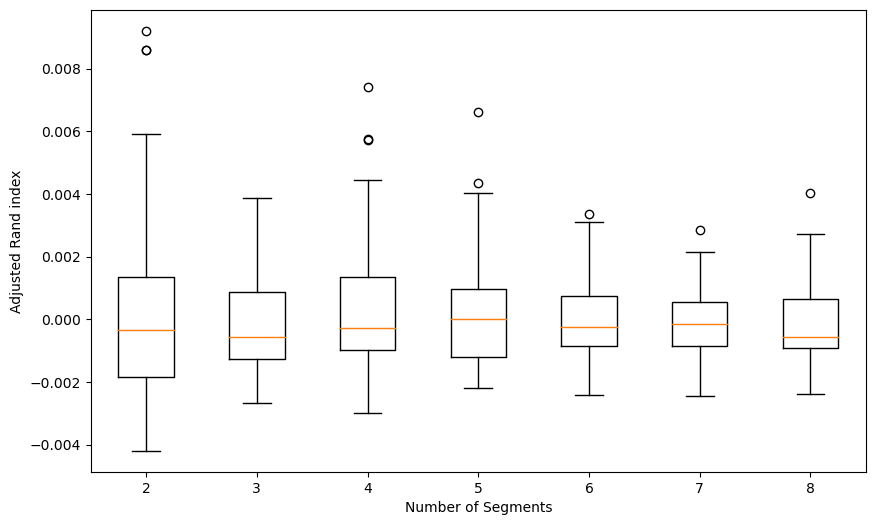

In [10]:
# Box Plot for Global stability of k-means segmentation solutions of the fast food data set.
np.random.seed(1234)
nboot = 100
ariscore = []

for labels in k_result:
    ariboot = []
    for _ in range(nboot):
        random_sample = np.random.choice(labels, size=len(labels), replace=True)
        ari = adjusted_rand_score(labels, random_sample)
        ariboot.append(ari)
    ariscore.append(ariboot)
plt.figure(figsize=(10, 6))
plt.boxplot(ariscore, labels=[str(k) for k in k_values], showfliers=True)
plt.xlabel('Number of Segments')
plt.ylabel('Adjusted Rand index')
plt.show()

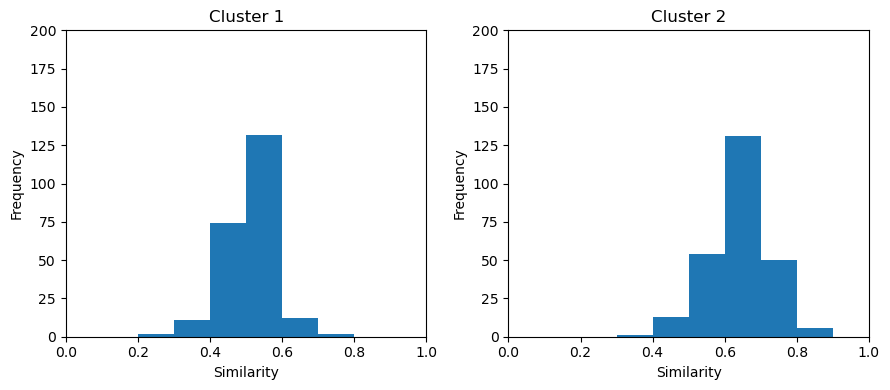

In [11]:
# Histogram of the k-means solution for the fast food data set
range_values = (0, 1)
num_bins = 10
max_frequency = 200
fig, axis = plt.subplots(1, 2, figsize=(9, 4))
for i in range(1, 3):
    cluster_i_data = md_x[labels == i]
    similarities = cluster_i_data.mean(axis=1)
    col = i - 1
    axis[col].hist(similarities, bins=num_bins, range=range_values)
    axis[col].set_xlabel('Similarity')
    axis[col].set_ylabel('Frequency')
    axis[col].set_title(f'Cluster {i}')
    axis[col].set_xlim(range_values)
    axis[col].set_ylim(0, max_frequency)
    axis[col].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
plt.tight_layout()
plt.show()

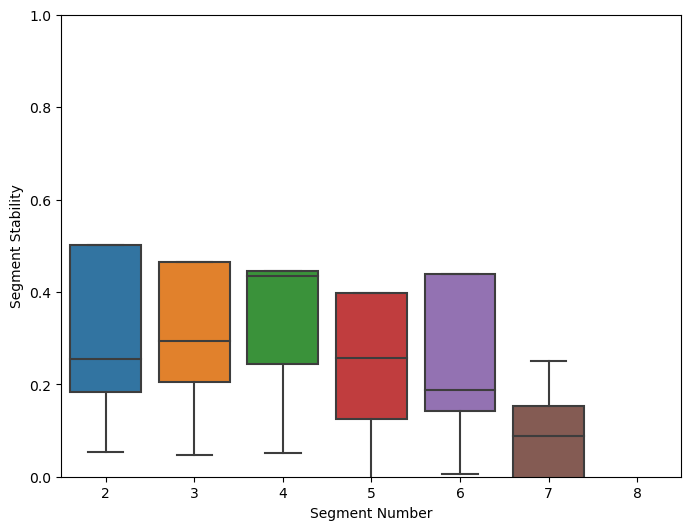

In [12]:
# Segment level stability within solutions (SLSW ) plot for the fast food data set.
silhouette_scores = silhouette_samples(md_x, labels, metric='euclidean')
data = {'Segment': labels, 'Silhouette Score': silhouette_scores}
df_silhouette = pd.DataFrame(data)
plt.figure(figsize=(8, 6))
sns.boxplot(x='Segment', y='Silhouette Score', data=df_silhouette, order=range(2, 9))
plt.xlabel('Segment Number')
plt.ylabel('Segment Stability')
plt.ylim(0, 1)
plt.show()

In [13]:
#5.2 Using Mixtures of Distributions
# Perform Gaussian Mixture Model clustering
gausmix = GaussianMixture(n_components=4, covariance_type='full', random_state=1234)
gausmix.fit(pca_df)
clusterassignments = gausmix.predict(pca_df)
model = KMeans(n_clusters=4, n_init=10, random_state=0)
model.fit(pca_df)
labels = model.predict(pca_df)
cnmatrix = confusion_matrix(labels, clusterassignments)

print("Accuracy using Confusion Matrix:")
print(cnmatrix)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


Accuracy using Confusion Matrix:
[[208   3  24   5]
 [  5   0 304   6]
 [ 46  64   1 207]
 [ 10 184  49 337]]


In [14]:
# 5.3 Using Mixtures of Regression Models
# Reverse the frequency table
likecounts = mcdonalds['Like'].value_counts().sort_index(ascending=False)
print(likecounts)

I love it!+5    143
I hate it!-5    152
4               160
3               229
2               187
1               152
0               169
-4               71
-3               73
-2               59
-1               58
Name: Like, dtype: int64


In [15]:
mcdonalds['Like_n'] = 6 - pd.to_numeric(mcdonalds['Like'], errors='coerce')
likencounts = mcdonalds['Like_n'].value_counts().sort_index(ascending=True)
print(likencounts)

2.0     160
3.0     229
4.0     187
5.0     152
6.0     169
7.0      58
8.0      59
9.0      73
10.0     71
Name: Like_n, dtype: int64


In [16]:
manualformula = 'Like_n ~ Var1 + Var2 + Var3 + Var4 + Var5 + Var6 + Var7 + Var8 + Var9 + Var10 + Var11'
automatedformula = 'Like_n ~ ' + ' + '.join(mcdonalds.columns[1:12])
automatedformula = smf.ols(automatedformula, data=mcdonalds).fit()
print(automatedformula.model.formula)

Like_n ~ convenient + spicy + fattening + greasy + fast + cheap + tasty + expensive + healthy + disgusting + Like


In [17]:
# Perform logistic regression
logreg = LogisticRegression(random_state=1234)
logreg.fit(md_x, labels)

LogisticRegression(random_state=1234)

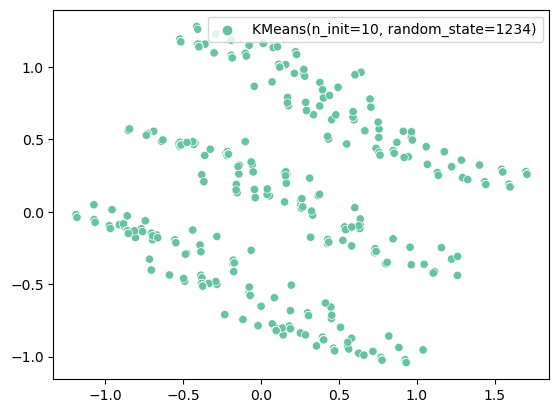

In [18]:
# Visualize the clustering results
sns.scatterplot(x=md_pca[:, 0], y=md_pca[:, 1], hue=md_k4, palette="Set2")
plt.show()

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


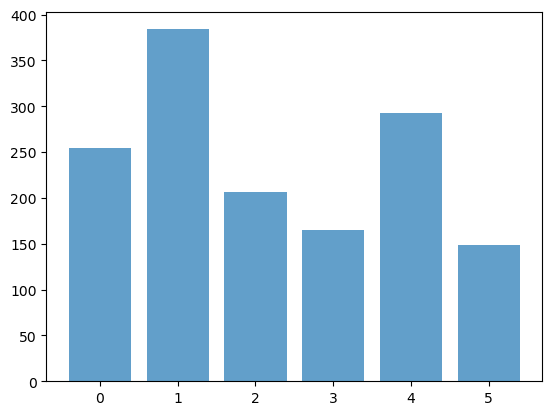

In [19]:
# Step 6: Profiling Segments
# Segment profile plot for the solution for the fast food data set
k6 = KMeans(n_clusters=6)
k6.fit(pca_df)
l6 = k6.predict(pca_df)
x = range(6)
height = []
for i in range(6):
    height.append(sum(l6 == i))
plt.bar(x, height, alpha=0.7);
plt.show()

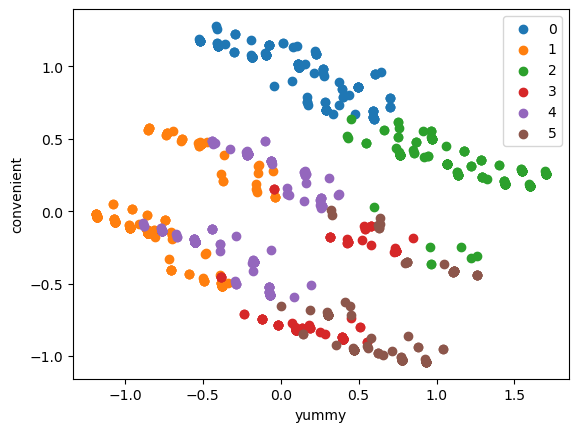

In [20]:
for i in range(6):
    temp = pca_df[['yummy', 'convenient']][l6 == i]
    plt.scatter(temp['yummy'], temp['convenient'], label=i)
plt.xlabel('yummy')
plt.ylabel('convenient')
plt.legend()
plt.show()

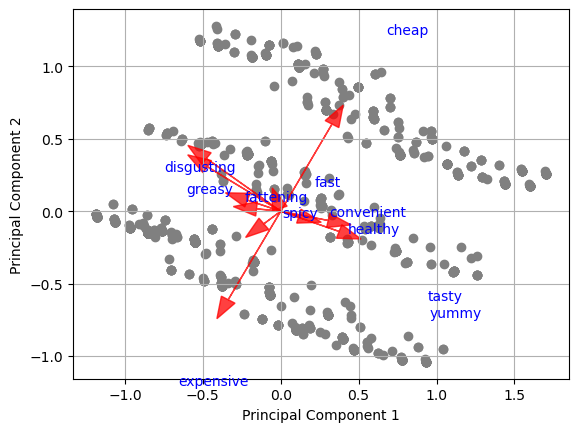

In [21]:
# Segment separation plot using principal components 1 and 2 for the fast food data set
plt.scatter(md_pca[:, 0], md_pca[:, 1], color='grey', label='Data Points')
for i in range(len(pca.components_)):
    plt.arrow(0, 0, pca.components_[0, i], pca.components_[1, i], color='red', alpha=0.75, linewidth=1, head_width=0.1, label=f'PC{i + 1} Axis')
for i, column_name in enumerate(mcdonalds.columns[0:11]):
    plt.text(-pca.components_[0, i] * 2, -pca.components_[1, i] * 2, column_name, color='blue')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()

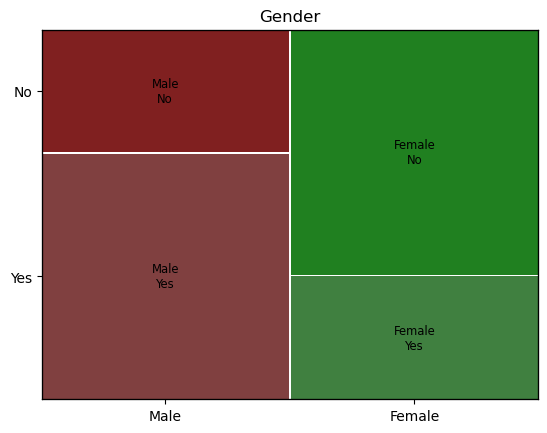

In [22]:
# Step 7: Describing Segments
# Shaded mosaic plot for cross-tabulation of segment membership and I LIKE IT for the fast food data set
data = {
    'Gender': ['Male', 'Female', 'Male', 'Female', 'Male', 'Female'],
    'Preference': ['Yes', 'No', 'Yes', 'No', 'No', 'Yes']
}
mosaic1 = pd.DataFrame(data)
mosaic(mosaic1,['Gender', 'Preference'], title='Gender')
plt.show()

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


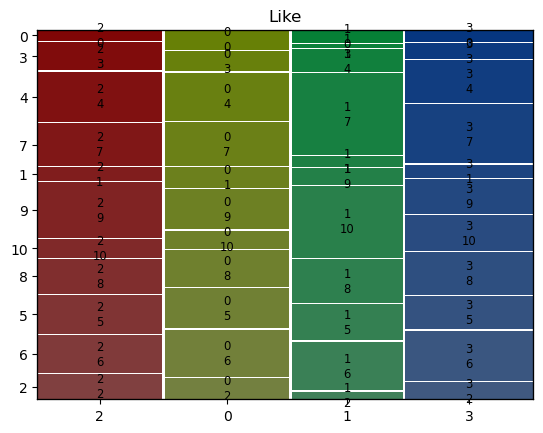

In [23]:
# Shaded mosaic plot for cross-tabulation of segment membership and I LIKE IT for the fast food data set
kmeans = KMeans(n_clusters=4)
dataset = mcdonalds.iloc[:, :].apply(lambda x: LabelEncoder().fit_transform(x))
kmeans.fit(dataset)
dataset['cluster'] = kmeans.labels_
mosaic(data=dataset, index=['cluster', 'Like'], title='Like')
plt.show()

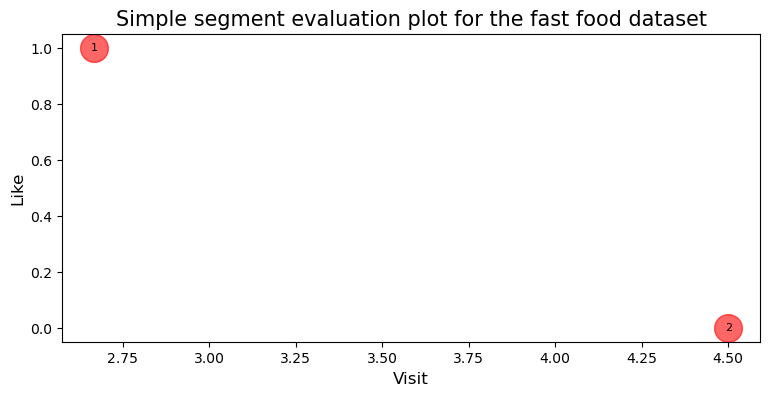

In [26]:
k4 = [-5, +5, -5, +5, -5]
mcdonalds = pd.DataFrame({'Like': ['Yes', 'No', 'Yes', 'No', 'Yes'],
                           'Gender': ['Male', 'Female', 'Male', 'Male', 'Female'],
                           'VisitFrequency': [3, 4, 2, 5, 3]})

visit = mcdonalds.groupby(k4)['VisitFrequency'].mean()
like = mcdonalds.groupby(k4)['Like'].apply(lambda x: (x == 'Yes').mean())
female_means = mcdonalds.groupby(k4)['Gender'].apply(lambda x: (x == 'Female').mean())
visit_values = visit.values
like_values = like.values
female_values = female_means.values
plt.figure(figsize=(9, 4))
plt.scatter(visit_values, like_values, s=400, c='red', alpha=0.6)  # 's' is marker size
plt.title("Simple segment evaluation plot for the fast food dataset", fontsize=15)
plt.xlabel("Visit", fontsize=12)
plt.ylabel("Like", fontsize=12)

for i, txt in enumerate(range(1, len(visit_values) + 1)):
    plt.text(visit_values[i], like_values[i], str(txt), fontsize=8, ha='center', va='center')

plt.show()